In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

data = np.loadtxt('train.txt', unpack=True, dtype=np.float32)
xdata = data.T[:, 0:-1]
ydata = data.T[:, -1]
ydata = np.reshape(ydata, (6, 1))

# bias, study hour, attendance
print (xdata)
print (ydata)

[[ 1.  2.  1.]
 [ 1.  3.  2.]
 [ 1.  3.  4.]
 [ 1.  5.  5.]
 [ 1.  7.  5.]
 [ 1.  2.  5.]]
[[ 0.]
 [ 0.]
 [ 0.]
 [ 1.]
 [ 1.]
 [ 1.]]


In [2]:
w = tf.Variable(tf.random_normal([3,1], -1.0, 1.0))
b = tf.Variable(tf.random_normal([1], -1.0, 1.0))
X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

In [3]:
hypothesis = 1 / (1 + tf.exp(-1 * tf.matmul(X, w)))
cost_function = tf.reduce_mean(-Y * tf.log(hypothesis) -(1-Y) * tf.log(1-hypothesis))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
updates = optimizer.minimize(cost_function)

In [4]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(4001):
        sess.run([cost_function, updates], feed_dict={X:xdata, Y:ydata})
        if i % 1000 == 0:
            print (sess.run(cost_function, feed_dict={X:xdata, Y:ydata}))
    
    theta_value = sess.run(w, feed_dict={X:xdata, Y:ydata})
    #------------------------------------------------
    print (sess.run(hypothesis, feed_dict={X:[[1, 2, 3]]}) > 0.5)
    print (sess.run(hypothesis, feed_dict={X:[[1, 4, 5]]}) > 0.5)
    print (sess.run(hypothesis, feed_dict={X:[[1, 2, 5]]}) > 0.5)
    print (sess.run(hypothesis, feed_dict={X:[[1, 1, 5]]}) > 0.5)
    print (sess.run(hypothesis, feed_dict={X:[[1, 5, 3]]}) > 0.5)
    print (sess.run(hypothesis, feed_dict={X:[[1, 0, 7]]}) > 0.5)

4.18208
0.4712
0.395813
0.349058
0.317287
[[False]]
[[ True]]
[[ True]]
[[ True]]
[[False]]
[[ True]]


[ 2.  3.  4.  5.  6.  7.]
-0.0783437146692
3.76957670077


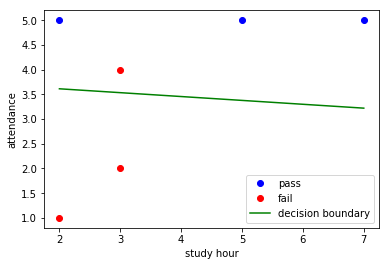

In [5]:
plotx = np.linspace(2, 7, 6)
alpha = -1 * theta_value[1, 0] / theta_value[2, 0]
beta = -1 * theta_value[0, 0] / theta_value[2, 0]
print (plotx)
print (alpha)
print (beta)
plt.plot(xdata[3:, 1], xdata[3:, 2], 'bo', label='pass')
plt.plot(xdata[0:3, 1], xdata[0:3, 2], 'ro', label='fail')
plt.plot(plotx, plotx*alpha+beta, 'g', label='decision boundary')
plt.xlabel('study hour')
plt.ylabel('attendance')
plt.legend()
plt.show()